<a href="https://colab.research.google.com/github/KrizHa/ML_task/blob/main/Copy_of_HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

cars_df = pd.read_csv('/content/drive/MyDrive/ML Course/data/cars.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [13]:
cars_df.describe().round(2)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,2018.39,28150.00,17.21,1855.23,158.13,5.23,1574000.00
std,29.01,1.17,9121.38,3.31,631.31,76.97,0.75,1000264.61
min,1.00,2016.00,10000.00,10.00,999.00,68.00,4.00,450000.00
25%,25.75,2017.75,22000.00,15.00,1462.00,103.00,5.00,700000.00
50%,50.50,2018.00,27000.00,17.00,1774.00,148.00,5.00,1300000.00
75%,75.25,2019.00,32000.00,19.00,2143.00,187.00,5.00,2500000.00
max,100.00,2021.00,60000.00,25.00,4951.00,396.00,7.00,4000000.00


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [14]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
#?pd.DataFrame.info

In [15]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [16]:
len(cars_df.select_dtypes(include = "object").columns), len(cars_df.select_dtypes(include = "int64").columns)

(5, 8)

In [17]:
cars_df.select_dtypes(include = "object").nunique()

,0
Brand,11
Model,58
Fuel_Type,2
Transmission,2
Owner_Type,3


В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (Fuel_Type та Transmission)
- 2 мультикатегоріальних (Brand та Model) зі значеннями, для яких немає відношення порядку
- 1 колонка (Owner_Type), в яких можна встановити відношення порядку - First<Second<Third

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [18]:
inputs, targets = cars_df.drop(columns=['Price', 'Car_ID']), cars_df['Price']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [20]:
#Визначаємо категорії, які місять більше значень
display(cars_df[['Fuel_Type']].value_counts(), cars_df[['Transmission']].value_counts())

,count
Fuel_Type,
Petrol,52
Diesel,48


,count
Transmission,
Automatic,57
Manual,43


In [21]:
#Кодуємо значення для Transmission
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['transmission_codes'] = X_train.Transmission.map(transmission_codes)
X_test['transmission_codes'] = X_test.Transmission.map(transmission_codes)

#Кодуємо значення для Fuel_Type
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['fuel_type_codes'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['fuel_type_codes'] = X_test.Fuel_Type.map(fuel_type_codes)

In [22]:
#Створюємо клас brand_enc
brand_enc = preprocessing.OneHotEncoder()

#Навчаємо на тренувальних даних
brand_enc.fit(X_train[['Brand']])

#Перетворюмо тренувальні та тестові колонки в One-Hot
train_encoded = brand_enc.transform(X_train[['Brand']]).toarray()
test_encoded = brand_enc.transform(X_test[['Brand']]).toarray()

#Присвоюємо значення
X_train[brand_enc.categories_[0]] = train_encoded
X_test[brand_enc.categories_[0]] = test_encoded

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [24]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,transmission_codes,fuel_type_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,transmission_codes,fuel_type_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

Колонки з кореляцією більше 0.5 зі змінною 'Price':
Mileage              -0.638404
Engine                0.710561
Power                 0.849137
transmission_codes    0.680731
Price                 1.000000
Name: Price, dtype: float64


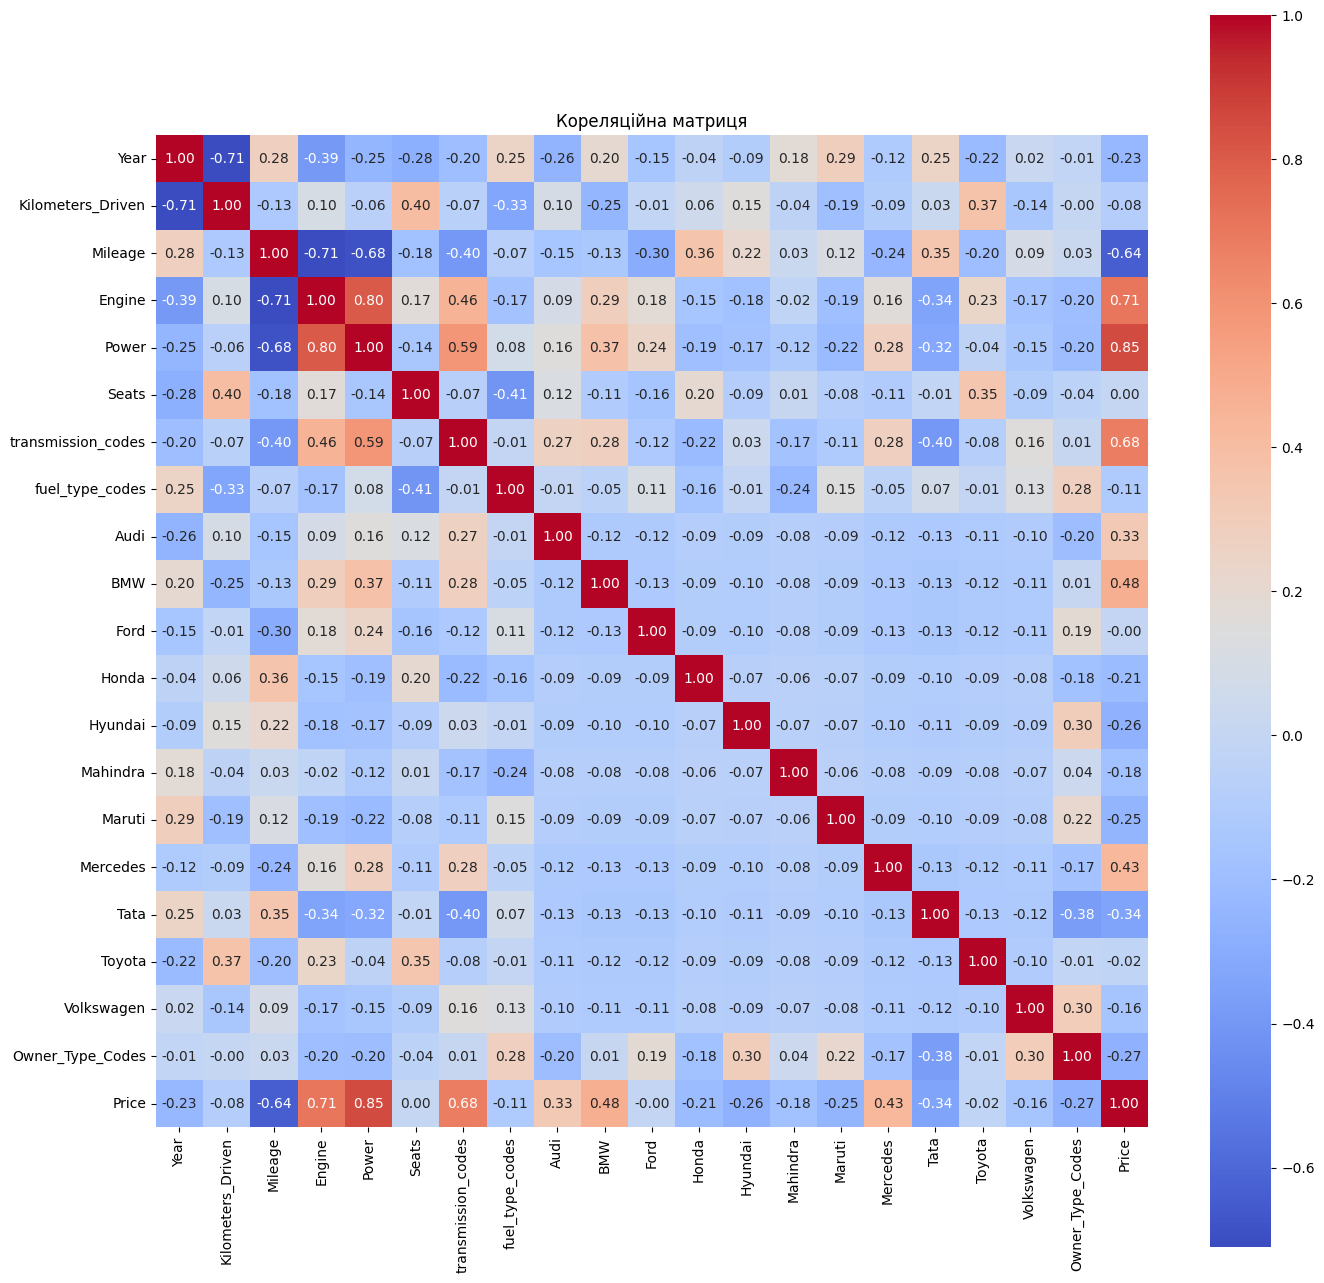

In [25]:
#Присвоюємо лише числові колонки для тренувального набору
X_train = X_train.select_dtypes(include = "number")

# Об'єднуємо X_train з y_train
data_combined = pd.concat([X_train, y_train], axis=1)

#Обчислюємо матрицю кореляції
correlation_matrix = data_combined.corr()

#Вибираємо лише рядок, який відповідає кореляціям усіх змінних із 'Price'
price_correlation = correlation_matrix['Price']

#Вибираємо лише ті змінні, які мають абсолютну кореляцію більше 0.5
correlated_features = price_correlation[price_correlation.abs() > 0.5]
print("Колонки з кореляцією більше 0.5 зі змінною 'Price':")
print(correlated_features)

#Будуємо теплову мапу
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Кореляційна матриця')
plt.show()

Найбільше з цільовою змінною корелють Mileage,Engine, Power, transmission_codes  
В Mileage кореляція негативна так як дорогі автомобілі зазвичай мають більші та потужніші двигуни, які споживають більше пального і відповідна менша кількість кілометрів на літр пального.

Також близьки до кореляціі в значені 0.5 марки BMW, Mercedec та Audi, шо вказує шо ці марки доволі суттєво впивають на ціну автомобіля.


**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

RMSE для тренувального набору: 210342.80
RMSE для тестувального набору: 259601.27


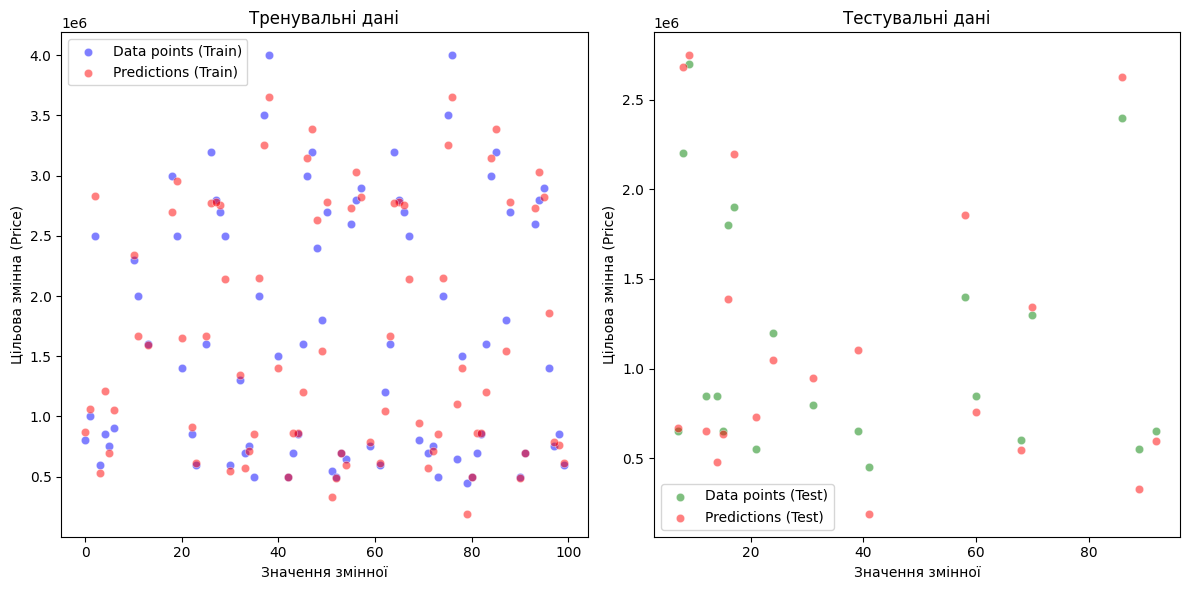

In [26]:
#Присвоюємо лише числові колонки для тренувального набору
X_test = X_test.select_dtypes(include = "number")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Зробимо передбачення на X_train і X_test
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

#Обраховуємо rmse
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print(f"RMSE для тренувального набору: {rmse_train:.2f}")
print(f"RMSE для тестувального набору: {rmse_test:.2f}")


# Графік для тренувального набору
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train.index, y=y_train, color='blue', label='Data points (Train)', alpha=0.5)
sns.scatterplot(x=y_train.index, y=y_train_pred, color='red', label='Predictions (Train)', alpha=0.5)
plt.title('Тренувальні дані')
plt.xlabel('Значення змінної')
plt.ylabel('Цільова змінна (Price)')
plt.legend()

# Графік для тестувального набору
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test.index, y=y_test, color='green', label='Data points (Test)', alpha=0.5)
sns.scatterplot(x=y_test.index, y=y_test_pred, color='red', label='Predictions (Test)', alpha=0.5)
plt.title('Тестувальні дані')
plt.xlabel('Значення змінної')
plt.ylabel('Цільова змінна (Price)')
plt.legend()

plt.tight_layout()
plt.show()


На графіку для тренувальних даних найбільше близько передбачені дані до реальних знаходяться для машин невеликої вартості. Далі зі зростання ціни відстань між данними збільшується.

На тестувальних даних розкид між реальними даними і передбаченням ще більше, що підтверджує  вищий RMSE для тестувального набору порівяно з тестувальним.
Хоча RMSE для тестувально і тренувального набору порівняно зі стандартним відхилення змінної Price 1000264.61 значно менше

Модель потребує доопрацювання для кращих результатів на тестових даних

In [28]:
#Перевіримо параметри моделі
weights_df = pd.DataFrame({
    'feature': X_train.columns.tolist() + ['intercept'],
    'weight': np.append(lin_reg.coef_, lin_reg.intercept_)
})
weights_df['weight'] = weights_df['weight'].round(2)
weights_df.sort_values('weight', ascending=False, key=abs)

,feature,weight
20,intercept,22529791.83
8,Audi,758803.05
15,Mercedes,733974.72
9,BMW,730326.85
13,Mahindra,-574912.61
12,Hyundai,-505043.27
14,Maruti,-394216.23
7,fuel_type_codes,-370607.51
10,Ford,-305098.17
18,Volkswagen,-258785.16


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [29]:
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'transmission_codes', 'fuel_type_codes', 'Audi', 'BMW', 'Ford', 'Honda',
       'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes'],
      dtype='object')

In [30]:
numeric_cols = ['Year',	'Kilometers_Driven', 'Mileage',	'Engine', 'Power', 'Seats']

# Ініціалізуємо StandardScaler з параметром set_output(transform="pandas")
scaler = StandardScaler().set_output(transform="pandas")

# Фітимо дані на тренувальному наборі
scaler.fit(X_train[numeric_cols])

#Трафсормуємо train та test
X_train_scaled = scaler.transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Присвоюємо їх назад у X_train і X_test
X_train[numeric_cols] = X_train_scaled
X_test[numeric_cols] = X_test_scaled

In [31]:
display(X_train.head()), display(X_test.head())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,transmission_codes,fuel_type_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,transmission_codes,fuel_type_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [34]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train, y_train)

#Зробимо передбачення на X_train і X_test
y_train_pred_scaled = lin_reg_scaled.predict(X_train)
y_test_pred_scaled = lin_reg_scaled.predict(X_test)

rmse_train_scaled = root_mean_squared_error(y_train, y_train_pred_scaled)
rmse_test_scaled = root_mean_squared_error(y_test, y_test_pred_scaled)
print(f"RMSE для тренувального набору: {rmse_train_scaled:.2f}")
print(f"RMSE для тестувального набору: {rmse_test_scaled:.2f}")

RMSE для тренувального набору: 210342.80
RMSE для тестувального набору: 259601.27


In [33]:
weights_df_scaled = pd.DataFrame({
    'feature': X_train.columns.tolist() + ['intercept'],
    'weight': np.append(lin_reg_scaled.coef_, lin_reg_scaled.intercept_)
})
weights_df_scaled['weight'] = weights_df_scaled['weight'].round(2)
weights_df_scaled.sort_values('weight', ascending=False, key=abs)

,feature,weight
20,intercept,1604275.61
8,Audi,758803.05
15,Mercedes,733974.72
9,BMW,730326.85
13,Mahindra,-574912.61
12,Hyundai,-505043.27
4,Power,500000.51
14,Maruti,-394216.23
7,fuel_type_codes,-370607.51
10,Ford,-305098.17


Найважливіші змінні за абсолютним значенням коефіцієнта:
Intercept (1604275.61) Це базове значення ціни без урахування інших факторів.Воно велике, бо ціни автомобілів вимірюються у сотнях тисяч або мільйонах.

Марка автомобіля: Audi (+758803.05), Mercedes (+733974.72), BMW (+730326.85). Шо також було помітно з матриці кореляціі. Преміальні марки значно підвищують ціну.

Mahindra (-574912.61), Hyundai (-505043.27), Maruti (-394216.23), Ford (-305098.17), Volkswagen (-258785.16) Впливають негативно, знижуючи ціну.

Power (+500000.51) потужніші автомобілі зазвичай дорожчі (більші двигуни, краща продуктивність).

Mileage (-131884.63) Негативний вплив: чим економічніший автомобіль, тим нижча ціна. Оскільки бюджетні автомобілі зазвичай мають вищий пробіг на літр пального, а преміальні – нижчий. Співпадає з високою негативною кореляцією.

fuel_type_codes (-370607.51) Негативний вплив: тип пального впливає на вартість. Можливо, бензинові  авто дешевші за дизельні

Kilometers_Driven (-99713.96) Негативний вплив: чим більше пробіг, тим нижча ціна.

Transmission_codes (+236367.64) Позитивний вплив: тип трансмісії впливає на ціну. Ймовірно, автоматична коробка передач дорожча за механічну.

Engine (-24683.08) **Негативний вплив, хоча в кореляції мав високе позитивне значення.**
Може бути пов’язано з тим, що об’єм двигуна сам по собі не є визначальним фактором, а скоріше поєднується з потужністю (Power).

Висновок

Найбільший позитивний вплив на ціну мають:
	•	Преміальні бренди (Audi, Mercedes, BMW)
	•	Потужність двигуна (Power)
	•	Автоматична коробка передач (transmission_codes)

Найбільший негативний вплив на ціну мають:
	•	Бюджетні бренди (Mahindra, Hyundai, Maruti, Ford, Volkswagen)
	•	Пробіг автомобіля (Kilometers_Driven)
	•	Економічність пального (Mileage) – дорожчі авто менш економні
	•	Тип пального (fuel_type_codes)


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [35]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,transmission_codes,fuel_type_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
Y = y_train
X = X_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params.round(2).sort_values(ascending=False, key=abs)

,0
const,1470585.97
Audi,892492.68
Mercedes,867664.36
BMW,864016.48
Power,500000.51
Mahindra,-441222.97
Hyundai,-371353.64
fuel_type_codes,-370607.51
Toyota,264147.14
Maruti,-260526.60


In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.34e-34
Time:                        19:00:34   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.471e+06   7.09

In [41]:
pvalues0_05 =results.pvalues.round(3).sort_values()

# Фільтруємо значення p-value, які менші за 0.05
pvalues_filtered = pvalues0_05[pvalues0_05 <= 0.05]

# Виводимо результат
print(pvalues_filtered)

const                 0.000
Mercedes              0.000
Audi                  0.000
fuel_type_codes       0.000
Power                 0.000
BMW                   0.000
Hyundai               0.001
Mahindra              0.001
transmission_codes    0.009
Toyota                0.019
Mileage               0.026
Maruti                0.028
dtype: float64


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [42]:
#Виводимо назви колонок зі значенням p-value, які менші за 0.05
print(", ".join([f"'{item}'" for item in pvalues_filtered.index.tolist()]))

'const', 'Mercedes', 'Audi', 'fuel_type_codes', 'Power', 'BMW', 'Hyundai', 'Mahindra', 'transmission_codes', 'Toyota', 'Mileage', 'Maruti'


In [44]:
#Тренуємо модель на значеннях p-value, які менші за 0.05
X_05 = X_train[[ 'Mercedes', 'Audi', 'fuel_type_codes', 'Power', 'BMW', 'Hyundai', 'Mahindra', 'transmission_codes', 'Toyota', 'Mileage', 'Maruti']]
X_05 = sm.add_constant(X_05)
model_05 = sm.OLS(Y,X_05)
results_05 = model_05.fit()
results_05.params.round(2).sort_values(ascending=False, key=abs)

,0
const,1347926.03
BMW,1060240.47
Mercedes,1017277.28
Audi,966467.53
Power,462607.86
Hyundai,-307347.64
Mahindra,-285940.66
fuel_type_codes,-264434.72
Toyota,259702.45
transmission_codes,254645.06


In [45]:
print(results_05.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           4.53e-41
Time:                        19:28:43   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.348e+06   6.68

Показники моделі на всіх даних
R-squared: 0.959
Adj. R-squared: 0.946

На даних зі значенням p-value, які менші за 0.05
R-squared: 0.954
Adj. R-squared: 0.947

Як бачимо різниця між моделями в значеннях мінімальна. В цілому обидва значення свідчать про те що що модель пояснює більшість змін у залежній змінній

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [46]:
pvalues0_25 =results.pvalues.round(3).sort_values()

# Фільтруємо значення p-value, які менші за 0.25
pvalues_filtered_25 = pvalues0_25[pvalues0_25 <= 0.25]

# Виводимо результат
print(", ".join([f"'{item}'" for item in pvalues_filtered_25.index.tolist()]))

'const', 'Mercedes', 'Audi', 'fuel_type_codes', 'Power', 'BMW', 'Hyundai', 'Mahindra', 'transmission_codes', 'Toyota', 'Mileage', 'Maruti', 'Kilometers_Driven', 'Ford', 'Volkswagen'


In [47]:
X_25 = X_train[['Mercedes', 'Audi', 'fuel_type_codes', 'Power', 'BMW', 'Hyundai', 'Mahindra', 'transmission_codes', 'Toyota', 'Mileage', 'Maruti', 'Kilometers_Driven', 'Ford', 'Volkswagen']]
X_25 = sm.add_constant(X_25)
model_25 = sm.OLS(Y,X_25)
results_25 = model_25.fit()
results_25.params.round(2).sort_values(ascending=False, key=abs)

,0
const,1413589.95
BMW,968007.51
Audi,954412.10
Mercedes,952897.93
Power,465207.82
Mahindra,-357476.55
fuel_type_codes,-323301.27
Toyota,303089.44
Hyundai,-271109.47
transmission_codes,240643.79


In [48]:
print(results_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     105.5
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           4.79e-39
Time:                        19:42:49   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      65   BIC:                             2255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.414e+06   8.88

Показники моделі на всіх даних
R-squared: 0.959
Adj. R-squared: 0.946

Має найвищий R-squared, що означає, що вона найкраще пояснює варіацію в ціні авто.
Але Adj. R-squared нижчий (0.946), що може свідчити про наявність зайвих змінних


На даних зі значенням p-value, які менші за 0.05
R-squared: 0.954
Adj. R-squared: 0.947

R-squared: 0.954 модель втрачає трохи точності, але все ще добре узагальнює дані без зайвих змінних виходячи з Adj. R-squared: 0.947


На даних зі значенням p-value, які менші за 0.25
R-squared: 0.958
Adj. R-squared: 0.949

R-squared майже як у першої моделі, але Adj. R-squared вищий ніж у двох інших, що свідчить про хорошу узагальненість


Із цих трьох використовувала би третю модель, так як вона моє найвищий Adj. R-squared а R-squared майже такий самий, як у моделі з усіма змінними, але без зайвих факторів і враховує достатньо змінних, щоб пояснити ціну авто, але не включає зайві незначущі змінні

